In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns      #Seaborn is a Python visualization library based on matplotlib. 
#%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
titanic=pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic.shape

(891, 12)

In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


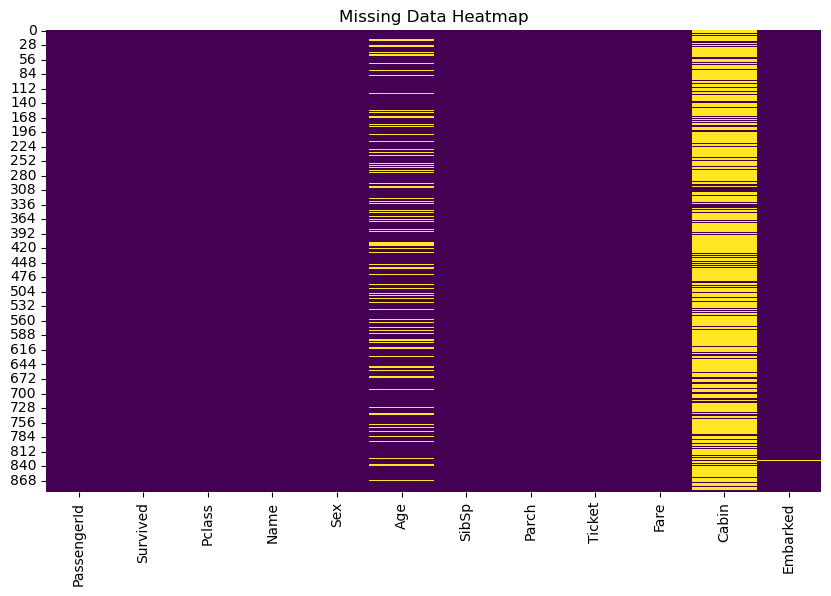

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\rajag\AppData\Local\Temp\ipykernel_10888\2184073557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [21]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [25]:
titanic=titanic.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

In [27]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [29]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [31]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [35]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


C:\Users\rajag\AppData\Local\Temp\ipykernel_10888\2242730640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic, palette='viridis')


Text(0.5, 1.0, 'Distribution of Survival (0 = No, 1 = Yes)')

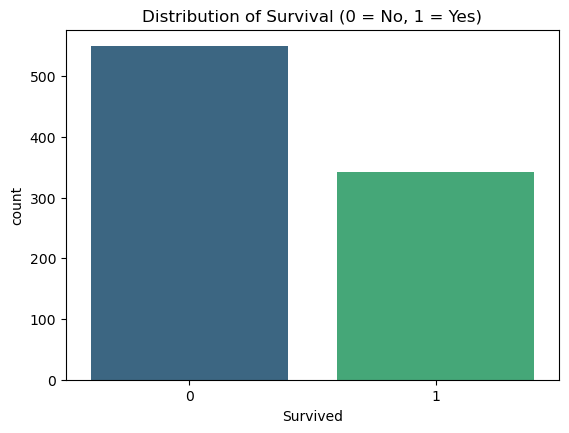

In [37]:
plt.figure(figsize=(14, 10))
# Survived distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=titanic, palette='viridis')
plt.title('Distribution of Survival (0 = No, 1 = Yes)')

C:\Users\rajag\AppData\Local\Temp\ipykernel_10888\1884990639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic, palette='coolwarm')


Text(0.5, 1.0, 'Distribution of Passenger Class')

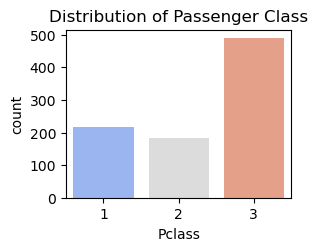

In [39]:
plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', data=titanic, palette='coolwarm')
plt.title('Distribution of Passenger Class')

C:\Users\rajag\AppData\Local\Temp\ipykernel_10888\2746400885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic, palette='Set2')


Text(0.5, 1.0, 'Distribution of Gender (0 = Male, 1 = Female)')

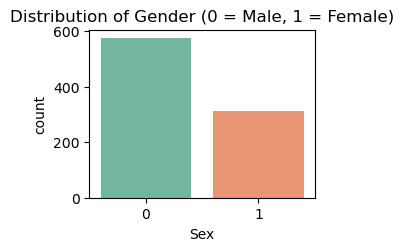

In [41]:
plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=titanic, palette='Set2')
plt.title('Distribution of Gender (0 = Male, 1 = Female)')

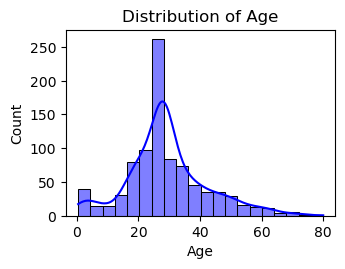

In [43]:
plt.subplot(2, 2, 4)
sns.histplot(titanic['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

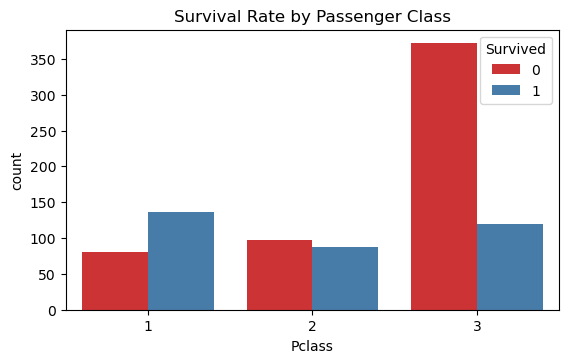

In [45]:
plt.figure(figsize=(14, 8))
# Survival vs Pclass
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='Set1')
plt.title('Survival Rate by Passenger Class')

Text(0.5, 1.0, 'Survival Rate by Gender')

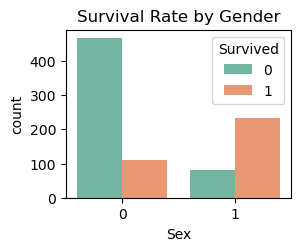

In [47]:
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='Set2')
plt.title('Survival Rate by Gender')

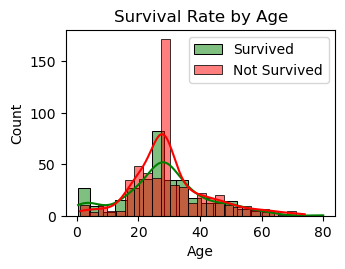

In [49]:
plt.subplot(2, 2, 3)
sns.histplot(titanic[titanic['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(titanic[titanic['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.tight_layout()
plt.show()

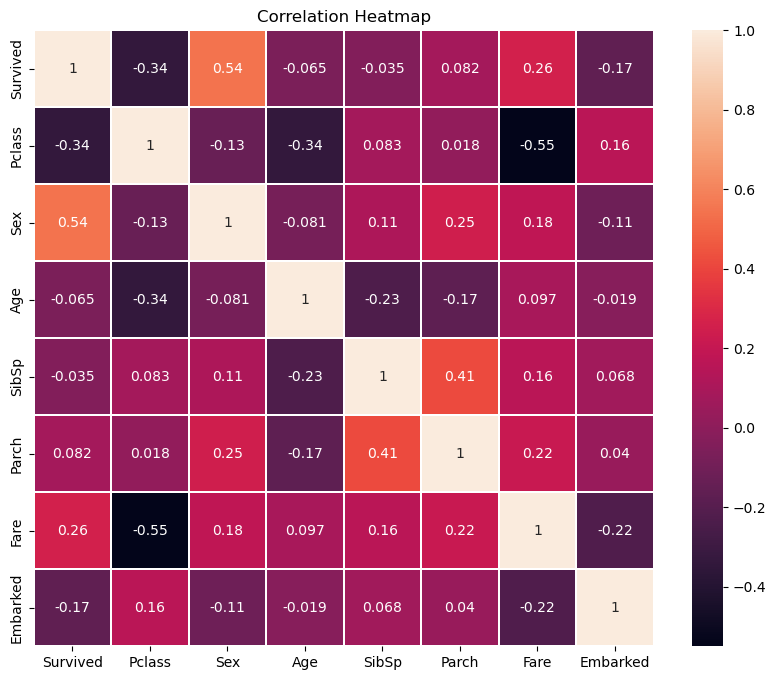

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x1000 with 0 Axes>

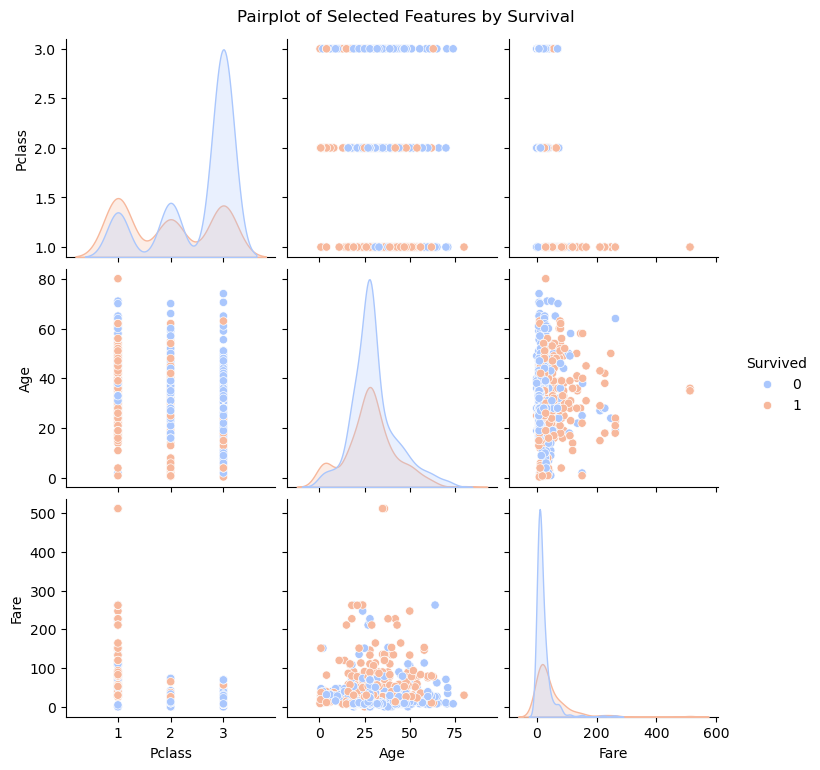

In [53]:
plt.figure(figsize=(12, 10))
sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)
plt.show()

In [54]:
x=titanic.drop(['Survived'],axis=1)
y=titanic['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =.2, random_state=25)

In [59]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [61]:
 model.score(X_train,y_train)

0.800561797752809

In [63]:
model.intercept_

array([2.44817691])

In [65]:
model.coef_

array([[-0.96351697,  2.56640321, -0.04347723, -0.35219448, -0.13579791,
         0.00281945, -0.20138502]])

In [67]:
y_pred = model.predict(X_test)

In [69]:
probs=model.predict_proba(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[95, 17],
       [19, 48]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       112
           1       0.74      0.72      0.73        67

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [75]:
import statsmodels.api as sm
model=sm.Logit(y_train,X_train)
model.fit()

model.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.460017
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.460017
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Survived         Pseudo R-squared: 0.310     
Date:               2025-01-09 09:23 AIC:              669.0637  
No. Observations:   712              BIC:              701.0403  
Df Model:           6                Log-Likelihood:   -327.53   
Df Residuals:       705              LL-Null:          -474.93   
Converged:          1.0000           LLR p-value:      1.0672e-60
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -0.4356    0.0947  -4.5997  0.0000  -0.6212  -0.2500
Sex            2.7111    0.2116  12.8107  0.0000   2.2963   3.1259
Age           -0.0208    0.0067  -3.1035  0.0019  -0.0340  -0.0077
SibSp         -0.3494    0.1178  -2.9663  0.0030  -0.5803  -0.1186
Parch         -0.2070    0.1249  -1.6577  0.0974  -0.4518   0.0377
Fare           0.0106    0.0033   3.2505  0.0012   0.0042   0.0171
Embarked      -0.0257    0.1213  -0.2116  0.8324  -0.2635   0.2122
=================================================================

"""